In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from normalize_data import getNormalizedDataset
from utils import target_encoding
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Métrica de evaluación
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [25]:
df = pd.read_csv('data/train.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])

df_test = pd.read_csv('data/test.csv',
        index_col='id',
        dtype={'gimnasio': int,
                'usosmultiples': int,
                'escuelascercanas': int,
                'piscina': int,
                'centroscomercialescercanos': int,
                'tipodepropiedad': 'category',
                'provincia': 'category',
                'ciudad': 'category'
            },
        parse_dates=['fecha'])


In [26]:
df_norm = getNormalizedDataset(df, 'train')
df_test_norm = getNormalizedDataset(df_test, 'test')

In [9]:
# El df train listo para entrenar y el test listo para hacer la prediccion definitiva
df_train, t_e = target_encoding(df_norm, 'train')
df_test_with_te, t_e = target_encoding(df_test_norm, 'test', t_e)

In [10]:
X = df_train.copy()
y = df_norm['precio']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# A comparar modelos

## ADABOOST

In [7]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [8]:
X_test.ciudad.fillna(0, inplace=True)
pred_adb = adb.predict(X_test)

/home/ggparente95/.local/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
score_adb = RMSLE(y_test, pred_adb)

## RANDOM FOREST

In [12]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/home/ggparente95/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [11]:
pred_rf = rf.predict(X_test)

In [12]:
score_rf = RMSLE(y_test, pred_rf)

## XGBOOST

In [13]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

/home/ggparente95/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [14]:
pred_xgb = xgb.predict(X_test)

In [15]:
score_xgb = RMSLE(y_test, pred_xgb)

# SVR

In [16]:
svr = LinearSVR(random_state=0, tol=1e-5)
svr.fit(X_train, y_train)

/home/ggparente95/.local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

In [17]:
pred_svr = svr.predict(X_test)

In [18]:
score_svr = RMSLE(y_test, pred_svr)

# Lasso

In [19]:
lass = linear_model.LassoLars(alpha=0.01)
lass.fit(X_train, y_train)

LassoLars(alpha=0.01, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [20]:
pred_lass = lass.predict(X_test)

In [21]:
score_lass = RMSLE(y_test, pred_svr)

## Linear regression

In [22]:
pred_lr = LinearRegression()\
                    .fit(X_train, y_train)\
                    .predict(X_test)

In [23]:
score_lr = RMSLE(y_test, pred_lr)

/home/ggparente95/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [24]:
print('LinearRegression: ', score_lr)
print('LassoRegression: ', score_lass)
print('SVR: ', score_svr)
print('XGBOOST: ', score_xgb)
print('RF: ', score_rf)
print('ADABOOST: ', score_adb)

LinearRegression:  0.5898739022058868
LassoRegression:  0.6162408040757841
SVR:  0.6162408040757841
XGBOOST:  0.39107697491958654
RF:  0.34505785641113185
ADABOOST:  0.5749455602038585


# FEATURE SELECTION

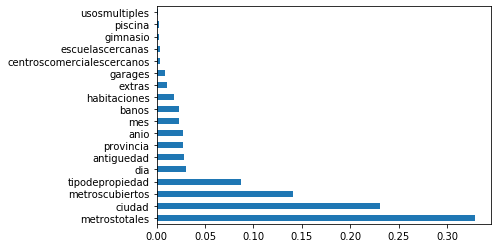

In [21]:

feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
feat_importances.nlargest(18).plot(kind='barh')

In [25]:
X.shape

(229690, 18)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=5)
clf = clf.fit(X, y)
clf.feature_importances_  

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               
